## Classifying movie reviews: Binary Classification

### IMDB Dataset

#### IMDB Data Preparation

In [1]:
#Load IMDB dataset
from keras.datasets import imdb
(train_data, train_label), (test_data, test_labels) = imdb.load_data(num_words = 10000)

Using TensorFlow backend.


In [2]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [3]:
print(train_label[0])

1


In [4]:
max([max(sequence) for sequence in train_data])

9999

#### Decode

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [10]:
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### Model Defination

In [13]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = optimizers.RMSprop(lr=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 85us/step - loss: 0.5335 - binary_accuracy: 0.7835 - val_loss: 0.4170 - val_binary_accuracy: 0.8502
Epoch 2/20
15000/15000 [==============================] - 1s 58us/step - loss: 0.3200 - binary_accuracy: 0.9001 - val_loss: 0.3181 - val_binary_accuracy: 0.8818
Epoch 3/20
15000/15000 [==============================] - 1s 58us/step - loss: 0.2322 - binary_accuracy: 0.9246 - val_loss: 0.2974 - val_binary_accuracy: 0.8810
Epoch 4/20
15000/15000 [==============================] - 1s 58us/step - loss: 0.1816 - binary_accuracy: 0.9417 - val_loss: 0.2918 - val_binary_accuracy: 0.8833
Epoch 5/20
15000/15000 [==============================] - 1s 57us/step - loss: 0.1471 - binary_accuracy: 0.9531 - val_loss: 0.2909 - val_binary_accuracy: 0.8858
Epoch 6/20
15000/15000 [==============================] - 1s 57us/step - loss: 0.1249 - binary_accuracy: 0.9605 - val_loss: 0.2897 - val_binary_a

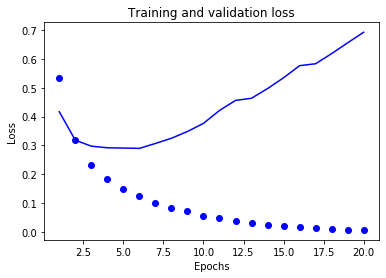

In [16]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [17]:
model.predict(x_test)

array([[0.00683954],
       [1.        ],
       [0.9750333 ],
       ...,
       [0.00157508],
       [0.00735676],
       [0.7658247 ]], dtype=float32)

### Returers Dataset

In [18]:
from keras.datasets import reuters

In [19]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data( num_words=10000)

In [20]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [22]:
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_label = to_one_hot(train_labels)
one_hot_test_label = to_one_hot(test_labels)

In [26]:
model2 = models.Sequential()
model2.add(layers.Dense(64, activation = 'relu', input_shape=(10000, )))
model2.add(layers.Dense(64, activation = 'relu'))
model2.add(layers.Dense(46, activation = 'softmax'))

model2.compile(optimizer = optimizers.RMSprop(lr=0.001),
              loss = losses.categorical_crossentropy,
              metrics = ['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_label[:1000]
partial_y_train = one_hot_train_label[1000:]

history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 87us/step - loss: 2.5727 - accuracy: 0.5183 - val_loss: 1.6919 - val_accuracy: 0.6500
Epoch 2/20
7982/7982 [==============================] - 0s 57us/step - loss: 1.3918 - accuracy: 0.7121 - val_loss: 1.2992 - val_accuracy: 0.7180
Epoch 3/20
7982/7982 [==============================] - 0s 57us/step - loss: 1.0455 - accuracy: 0.7759 - val_loss: 1.1578 - val_accuracy: 0.7600
Epoch 4/20
7982/7982 [==============================] - 0s 56us/step - loss: 0.8330 - accuracy: 0.8201 - val_loss: 1.0444 - val_accuracy: 0.7800
Epoch 5/20
7982/7982 [==============================] - 0s 57us/step - loss: 0.6719 - accuracy: 0.8596 - val_loss: 1.0141 - val_accuracy: 0.7880
Epoch 6/20
7982/7982 [==============================] - 0s 57us/step - loss: 0.5425 - accuracy: 0.8852 - val_loss: 0.9558 - val_accuracy: 0.8020
Epoch 7/20
7982/7982 [==============================] - 0s 56us/step - loss: 0.439

#### Boston House Prices

In [27]:
from keras.datasets import boston_housing

In [28]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()